# NBaIoT SOM+Algos CLASSIFY

## Device 6

- Training on device 6 (using both Mirai and Gafgyt).
- Testing on device 6 (both Mirai & Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.getcwd()))
sys.path.append(os.path.dirname(os.getcwd()))

/home/ladin/projects/research/papers/SOM-KNN-IoT_AD


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_partial, som_test, load_data_test

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 6

In [8]:
train_index

6

# 1. Load data and preprocess data

In [9]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt, data_mirai, target_mirai = get_data(choose_folder=choose_folder, choose_index=train_index)

In [10]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape), (data_mirai.shape, target_mirai.shape)

(((98514, 115), (98514,)),
 ((309040, 115), (309040,)),
 ((429337, 115), (429337,)))

## Split data

In [11]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

data_mirai_train, data_mirai_test, target_mirai_train, target_mirai_test = train_test_split(data_mirai, target_mirai, test_size=0.3, shuffle=True, random_state=1)

In [12]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((68959, 115), (29555, 115), (68959,), (29555,))

In [13]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((216328, 115), (92712, 115), (216328,), (92712,))

In [14]:
data_mirai_train.shape, data_mirai_test.shape, target_mirai_train.shape, target_mirai_test.shape

((300535, 115), (128802, 115), (300535,), (128802,))

## Set ratio

In [15]:
benign_size = data_benign_train.shape[0]
print(benign_size)

68959


In [16]:
# ratio_001 = int(0.01*benign_size)
# ratio_01 = int(0.1*benign_size)
# ratio_05 = int(0.5*benign_size)
ratio_1 = int(1.0*benign_size)
# ratio_2 = int(2.0*benign_size)
# ratio_5 = int(5.0*benign_size)

## Get train data of benign and gafgyt by ratio

In [17]:
# train 0.01
# data_gafgyt_001, _, target_gafgyt_001, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_gafgyt_01, _, target_gafgyt_01, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_gafgyt_05, _, target_gafgyt_05, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_gafgyt_2, _, target_gafgyt_2, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_gafgyt_5, _, target_gafgyt_5, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [18]:
# print(data_gafgyt_001.shape, target_gafgyt_001.shape)
# print(data_gafgyt_01.shape, target_gafgyt_01.shape)
# print(data_gafgyt_05.shape, target_gafgyt_05.shape)
print(data_gafgyt_1.shape, target_gafgyt_1.shape)
# print(data_gafgyt_2.shape, target_gafgyt_2.shape)
# print(data_gafgyt_5.shape, target_gafgyt_5.shape)

(68959, 115) (68959,)


In [19]:
# 0.01
# X_train_gafgyt_001 = np.vstack([data_benign_train, data_gafgyt_001])
# y_train_gafgyt_001 = np.hstack([target_benign_train, target_gafgyt_001])

# 0.1
# X_train_gafgyt_01 = np.vstack([data_benign_train, data_gafgyt_01])
# y_train_gafgyt_01 = np.hstack([target_benign_train, target_gafgyt_01])

# # 0.5
# X_train_gafgyt_05 = np.vstack([data_benign_train, data_gafgyt_05])
# y_train_gafgyt_05 = np.hstack([target_benign_train, target_gafgyt_05])

# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

# # 2.0
# X_train_gafgyt_2 = np.vstack([data_benign_train, data_gafgyt_2])
# y_train_gafgyt_2 = np.hstack([target_benign_train, target_gafgyt_2])

# 5.0
# X_train_gafgyt_5 = np.vstack([data_benign_train, data_gafgyt_5])
# y_train_gafgyt_5 = np.hstack([target_benign_train, target_gafgyt_5])

In [20]:
# print(X_train_gafgyt_001.shape, y_train_gafgyt_001.shape)
# print(X_train_gafgyt_01.shape, y_train_gafgyt_01.shape)
# print(X_train_gafgyt_05.shape, y_train_gafgyt_05.shape)
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)
# print(X_train_gafgyt_2.shape, y_train_gafgyt_2.shape)
# print(X_train_gafgyt_5.shape, y_train_gafgyt_5.shape)

(137918, 115) (137918,)


## Get train data of benign and Mirai by ratio

In [21]:
# train 0.01
# data_mirai_001, _, target_mirai_001, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_001, shuffle=True, random_state = 1)

# train 0.1
# data_mirai_01, _, target_mirai_01, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_01, shuffle=True, random_state = 1)

# # train 0.5
# data_mirai_05, _, target_mirai_05, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_05, shuffle=True, random_state = 1)

# train 1.0
data_mirai_1, _, target_mirai_1, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_1, shuffle=True, random_state = 1)

# # train 2.0
# data_mirai_2, _, target_mirai_2, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_2, shuffle=True, random_state = 1)

# train 5.0
# data_mirai_5, _, target_mirai_5, _ = train_test_split(data_mirai_train, target_mirai_train, train_size=ratio_5, shuffle=True, random_state = 1)

In [22]:
# print(data_mirai_001.shape, target_mirai_001.shape)
# print(data_mirai_01.shape, target_mirai_01.shape)
# print(data_mirai_05.shape, target_mirai_05.shape)
print(data_mirai_1.shape, target_mirai_1.shape)
# print(data_mirai_2.shape, target_mirai_2.shape)
# print(data_mirai_5.shape, target_mirai_5.shape)

(68959, 115) (68959,)


In [23]:
# 0.01
# X_train_mirai_001 = np.vstack([data_benign_train, data_mirai_001])
# y_train_mirai_001 = np.hstack([target_benign_train, target_mirai_001])

# 0.1
# X_train_mirai_01 = np.vstack([data_benign_train, data_mirai_01])
# y_train_mirai_01 = np.hstack([target_benign_train, target_mirai_01])

# # 0.5
# X_train_mirai_05 = np.vstack([data_benign_train, data_mirai_05])
# y_train_mirai_05 = np.hstack([target_benign_train, target_mirai_05])

# 1.0
X_train_mirai_1 = np.vstack([data_benign_train, data_mirai_1])
y_train_mirai_1 = np.hstack([target_benign_train, target_mirai_1])

# # 2.0
# X_train_mirai_2 = np.vstack([data_benign_train, data_mirai_2])
# y_train_mirai_2 = np.hstack([target_benign_train, target_mirai_2])

# 5.0
# X_train_mirai_5 = np.vstack([data_benign_train, data_mirai_5])
# y_train_mirai_5 = np.hstack([target_benign_train, target_mirai_5])

In [24]:
# print(X_train_mirai_001.shape, y_train_mirai_001.shape)
# print(X_train_mirai_01.shape, y_train_mirai_01.shape)
# print(X_train_mirai_05.shape, y_train_mirai_05.shape)
print(X_train_mirai_1.shape, y_train_mirai_1.shape)
# print(X_train_mirai_2.shape, y_train_mirai_2.shape)
# print(X_train_mirai_5.shape, y_train_mirai_5.shape)

(137918, 115) (137918,)


## Get test data

### Gafgyt

In [25]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(122267, 115) (122267,)


In [26]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((29555, 115), (92712, 115), (29555,), (92712,))

## Mirai

In [27]:
X_test_mirai = np.vstack([data_benign_test, data_mirai_test])
y_test_mirai = np.hstack([target_benign_test, target_mirai_test])
print(X_test_mirai.shape, y_test_mirai.shape)

(158357, 115) (158357,)


In [28]:
X_test_mirai, _ ,y_test_mirai, _ = train_test_split(X_test_mirai, y_test_mirai, train_size=0.7, shuffle=True, random_state=1)

In [29]:
print(X_test_mirai.shape, y_test_mirai.shape)

(110849, 115) (110849,)


# 2. SOM train and test

## 2.1. Train gafgyt

## 2.1.1. Rand

In [30]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, 
#                                                                  algo='rand')

### Test on the same device

#### Test on gafgyt

In [31]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [32]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [33]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [34]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.1.2. TPE

### Train

In [35]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='tpe')

### Test on first device

#### Test on gafgyt

In [36]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [37]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [38]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [39]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.1.3. ATPE

### Train

In [40]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
                                                                 y_train=y_train_gafgyt_1, algo='atpe')

--------------Training and testing in the same device----------------
(137918, 115) (137918,)
------------Scale data-----------------
(137918, 115) (137918,)
X_train_scaled
[[ 6.58495870e-03  8.26417879e-02  1.57259353e-08 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.84111666e-03  1.31751364e-01  7.19346696e-02 ...  4.73810971e-18
   0.00000000e+00  0.00000000e+00]
 [ 9.85589724e-03  1.00520871e-01  5.55097169e-18 ...  1.90671423e-04
  -1.78493986e-06 -2.39983277e-02]
 ...
 [ 6.57051763e-03  1.00520871e-01  0.00000000e+00 ...  1.89971962e-04
  -1.74372935e-06 -2.35207208e-02]
 [ 3.71307177e-02  1.41258531e-01  5.23303067e-02 ...  1.24342339e-01
   1.34095350e-01  3.08147475e-01]
 [ 1.85462229e-01  1.88592381e-01  1.09557469e-01 ...  3.33963680e-05
   0.00000000e+00  0.00000000e+00]]
---------Normalize data--------------
(137918, 115) (137918,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.997     0.996     29555
           2      0.999     0.998     0.999     92712

    accuracy                          0.998    122267
   macro avg      0.996     0.998     0.997    122267
weighted avg      0.998     0.998     0.998    122267



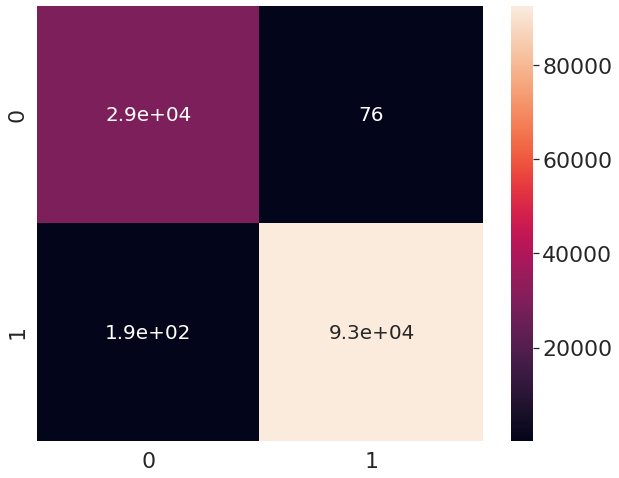

AUC score:  0.9977057621071465


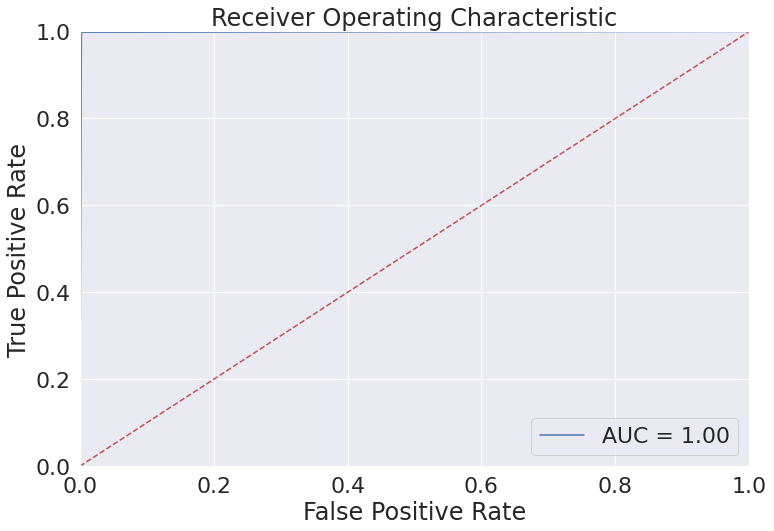

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [41]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.997     0.996     29555
           2      0.999     0.998     0.999     92712

    accuracy                          0.998    122267
   macro avg      0.997     0.998     0.997    122267
weighted avg      0.998     0.998     0.998    122267



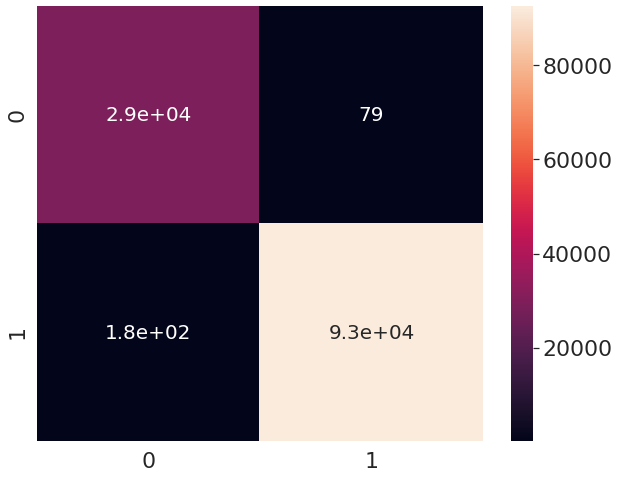

AUC score:  0.9976819744990916


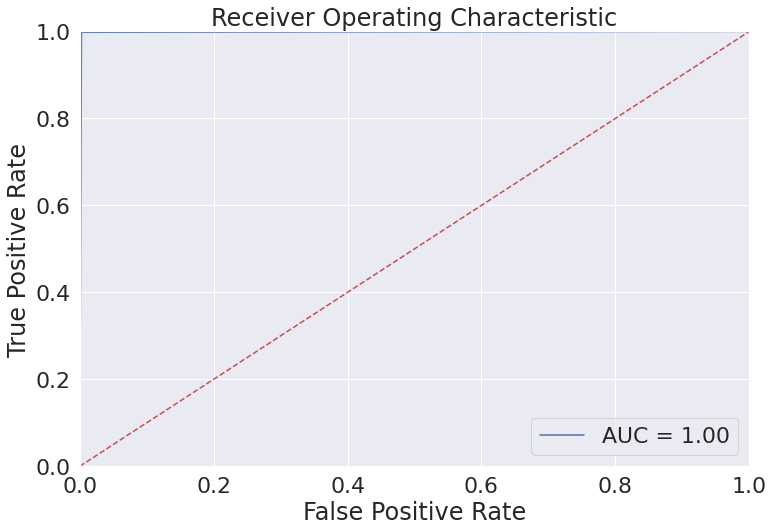

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='KNN')

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.997     0.996     29555
           2      0.999     0.998     0.999     92712

    accuracy                          0.998    122267
   macro avg      0.996     0.998     0.997    122267
weighted avg      0.998     0.998     0.998    122267



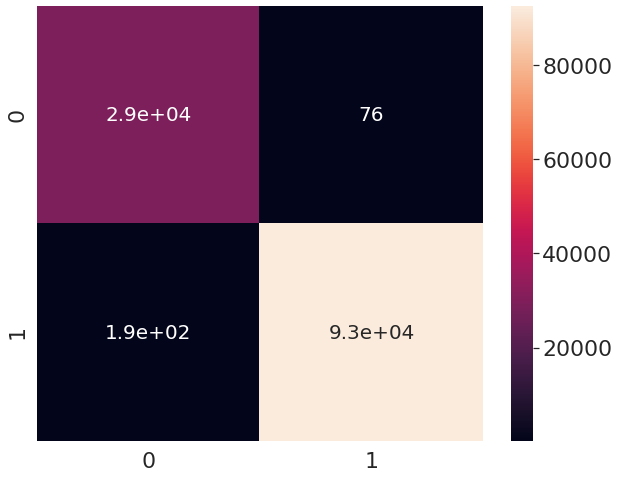

AUC score:  0.9977057621071465


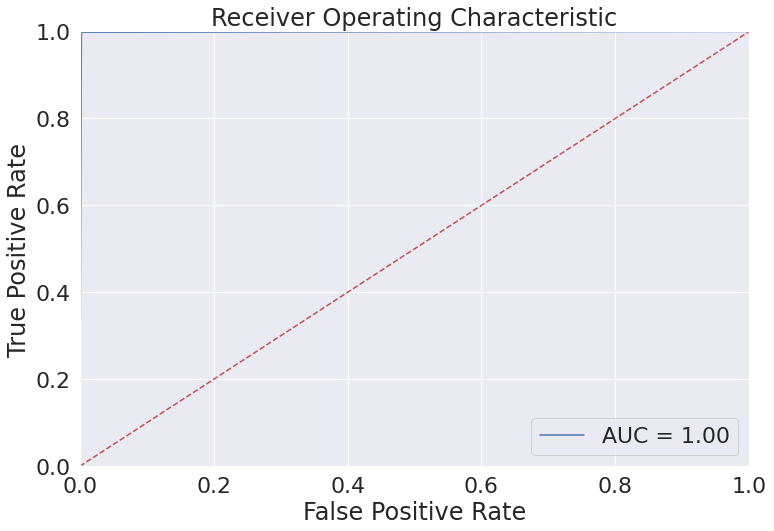

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [43]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SVM')

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.997     0.996     29555
           2      0.999     0.998     0.999     92712

    accuracy                          0.998    122267
   macro avg      0.996     0.998     0.997    122267
weighted avg      0.998     0.998     0.998    122267



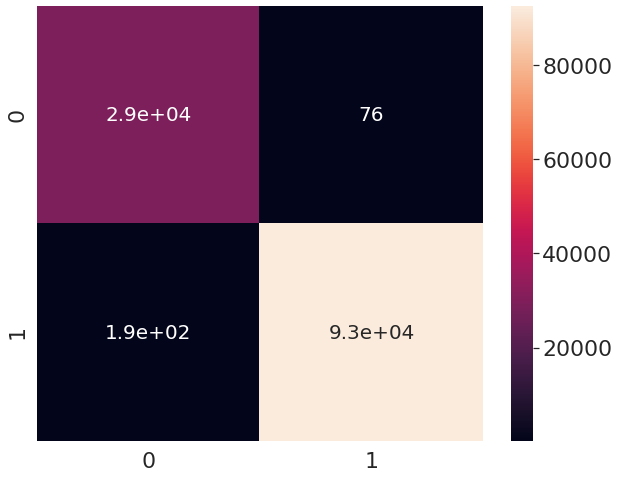

AUC score:  0.9977057621071465


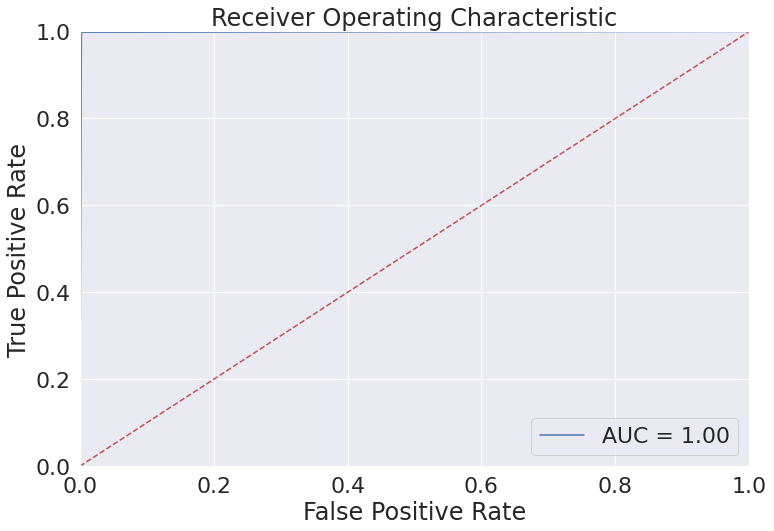

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [44]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='SOFTMAX')

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.994     0.997     0.996     29555
           2      0.999     0.998     0.999     92712

    accuracy                          0.998    122267
   macro avg      0.996     0.998     0.997    122267
weighted avg      0.998     0.998     0.998    122267



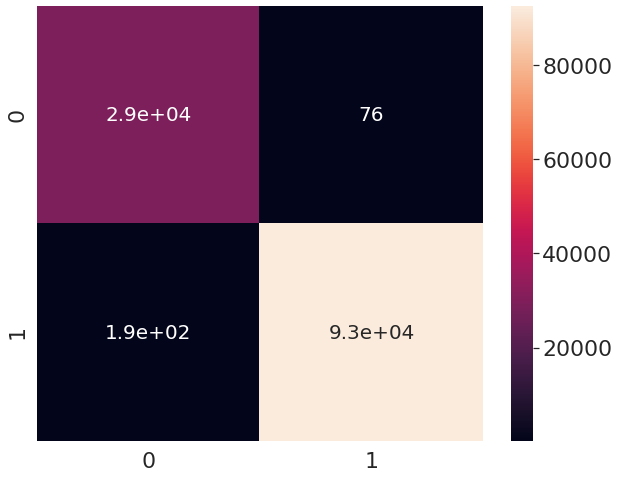

AUC score:  0.9977057621071465


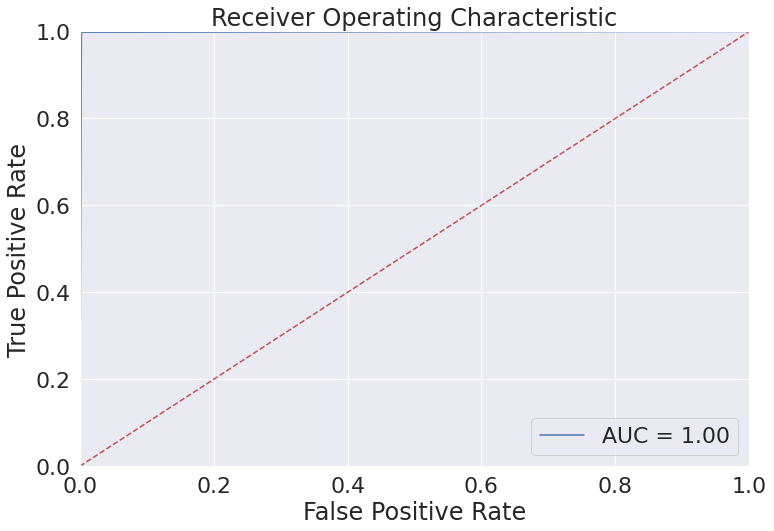

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [45]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt,
         y_test=y_test_gafgyt, using_algo=True, algo='RF')

#### Test on Mirai

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.266     0.997     0.420     20653
           2      0.998     0.371     0.541     90196

    accuracy                          0.488    110849
   macro avg      0.632     0.684     0.481    110849
weighted avg      0.862     0.488     0.519    110849



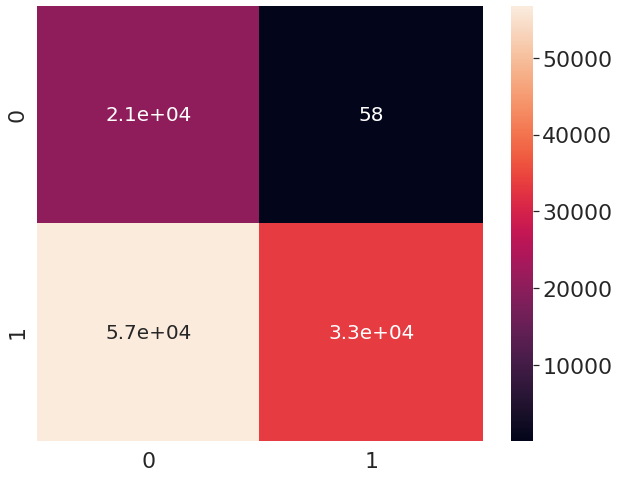

AUC score:  0.6842360070660859


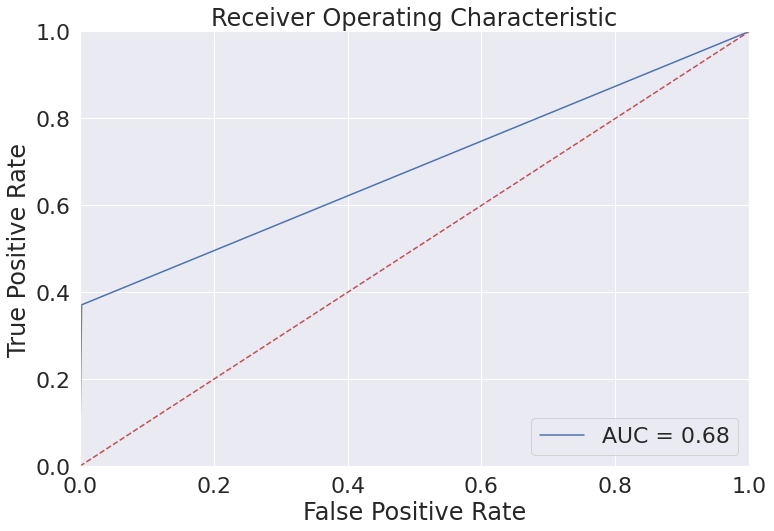

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [46]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.266     0.997     0.421     20653
           2      0.998     0.371     0.541     90196

    accuracy                          0.488    110849
   macro avg      0.632     0.684     0.481    110849
weighted avg      0.862     0.488     0.519    110849



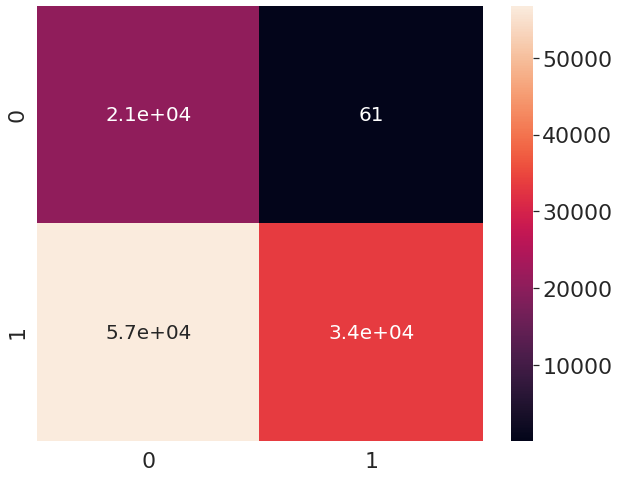

AUC score:  0.6842354436723422


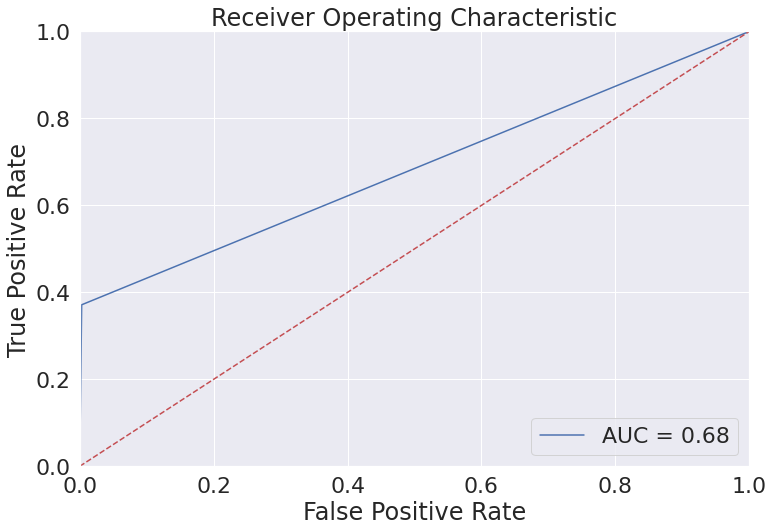

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [47]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='KNN')

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.266     0.997     0.420     20653
           2      0.998     0.371     0.541     90196

    accuracy                          0.488    110849
   macro avg      0.632     0.684     0.481    110849
weighted avg      0.862     0.488     0.519    110849



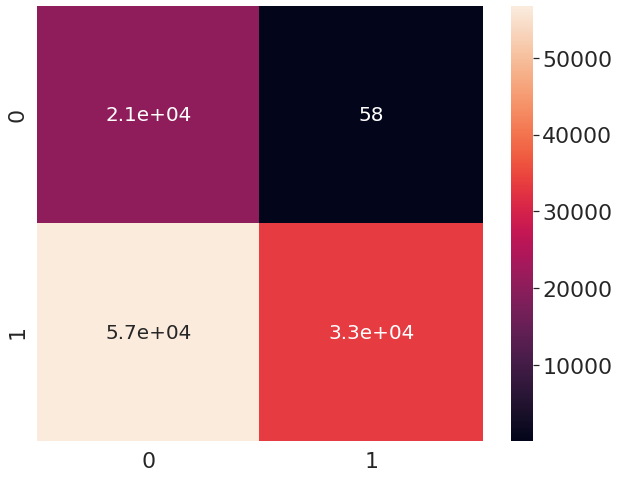

AUC score:  0.6842360070660859


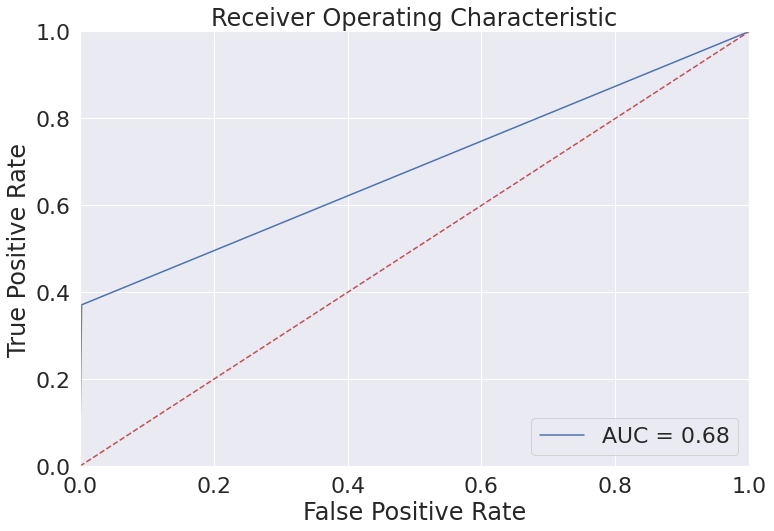

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [48]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SVM')

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.266     0.997     0.420     20653
           2      0.998     0.371     0.541     90196

    accuracy                          0.488    110849
   macro avg      0.632     0.684     0.481    110849
weighted avg      0.862     0.488     0.519    110849



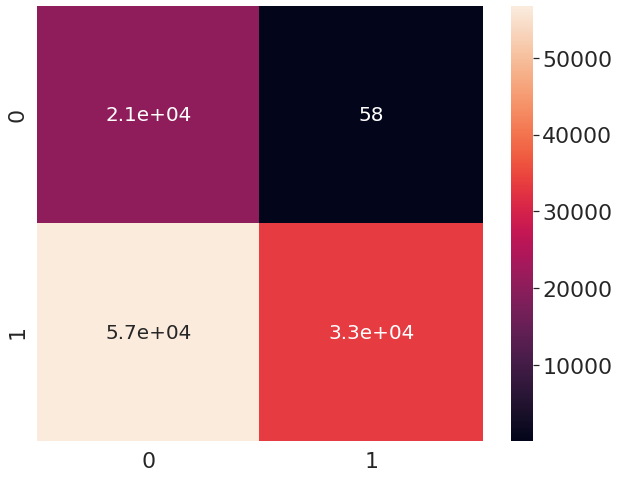

AUC score:  0.6842360070660859


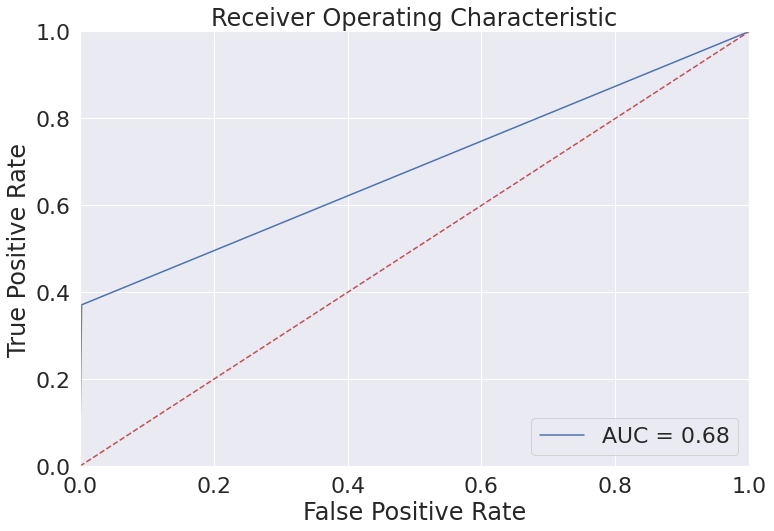

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [49]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='SOFTMAX')

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.266     0.997     0.420     20653
           2      0.998     0.371     0.541     90196

    accuracy                          0.488    110849
   macro avg      0.632     0.684     0.481    110849
weighted avg      0.862     0.488     0.519    110849



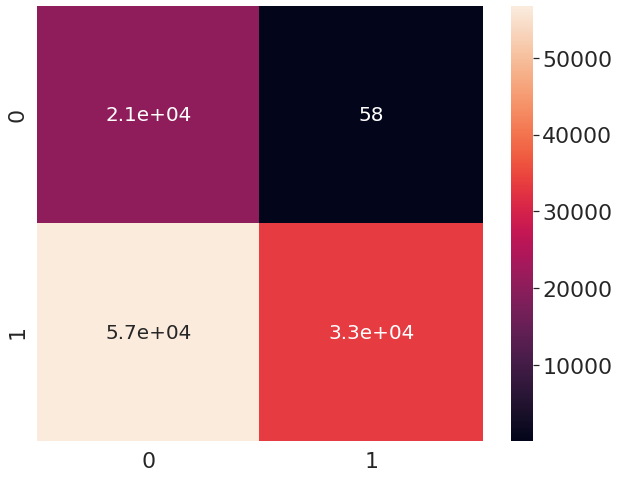

AUC score:  0.6842360070660859


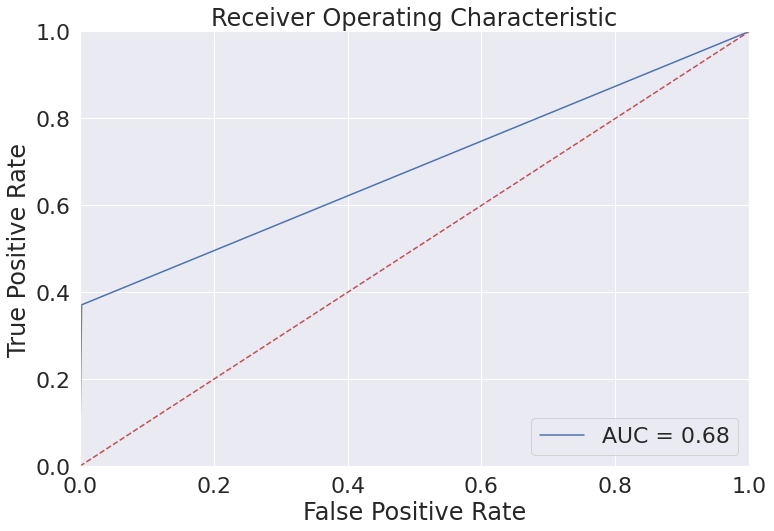

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [50]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo='RF')


## 2.1.4. Anneal

### Train

In [51]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_gafgyt_1, 
#                                                                  y_train=y_train_gafgyt_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [52]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [53]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [54]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [55]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2. Train Mirai

## 2.2.1. RAND

In [56]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='rand')

### Test on the same device

#### Test on gafgyt

In [57]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [58]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [59]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [60]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)

## 2.2.2. TPE

### Train

In [61]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='tpe')

### Test on the same device

#### Test on gafgyt

In [62]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [63]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [64]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = False)

In [65]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_mirai, y_test=y_test_mirai, using_knn = True)


## 2.2.3. ATPE

### Train

In [66]:
som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
                                                                 y_train=y_train_mirai_1, algo='atpe')

--------------Training and testing in the same device----------------
(137918, 115) (137918,)
------------Scale data-----------------
(137918, 115) (137918,)
X_train_scaled
[[ 5.28964307e-03  8.26417879e-02  1.57259353e-08 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 5.49541264e-03  1.31751364e-01  7.19346696e-02 ...  5.41857340e-18
   0.00000000e+00  0.00000000e+00]
 [ 7.91716105e-03  1.00520871e-01  5.55097169e-18 ...  2.18054702e-04
  -2.59086333e-06 -3.21075415e-02]
 ...
 [ 5.27804267e-03  1.00520871e-01  0.00000000e+00 ...  2.17254788e-04
  -2.53104574e-06 -3.14685477e-02]
 [ 2.98267996e-02  1.41258531e-01  5.23303067e-02 ...  1.42199765e-01
   1.94641138e-01  4.12272803e-01]
 [ 1.48980281e-01  1.88592381e-01  1.09557469e-01 ...  3.81925879e-05
   0.00000000e+00  0.00000000e+00]]
---------Normalize data--------------
(137918, 115) (137918,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM------------------------

### Test on the same device

#### Test on gafgyt

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.308     0.998     0.471     29555
           2      0.998     0.286     0.445     92712

    accuracy                          0.458    122267
   macro avg      0.653     0.642     0.458    122267
weighted avg      0.831     0.458     0.451    122267



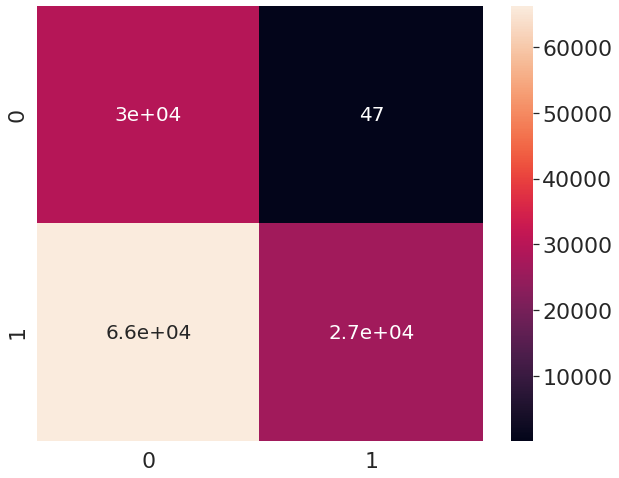

AUC score:  0.6423902204470288


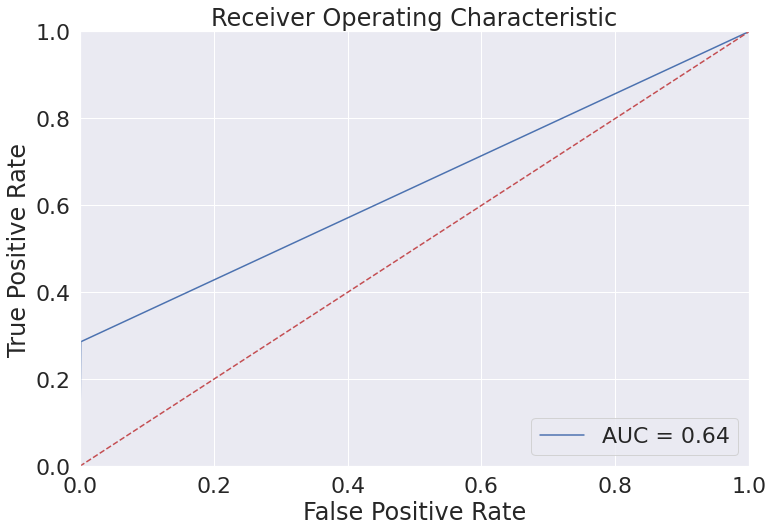

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [67]:
# doest not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = False)

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.308     0.998     0.471     29555
           2      0.998     0.286     0.445     92712

    accuracy                          0.458    122267
   macro avg      0.653     0.642     0.458    122267
weighted avg      0.831     0.458     0.451    122267



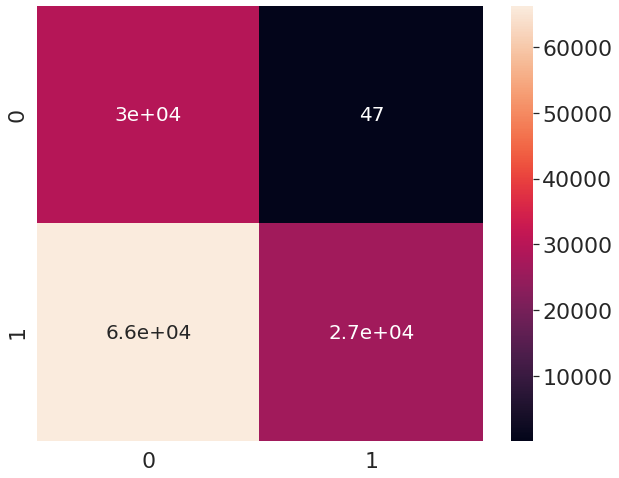

AUC score:  0.6423902204470288


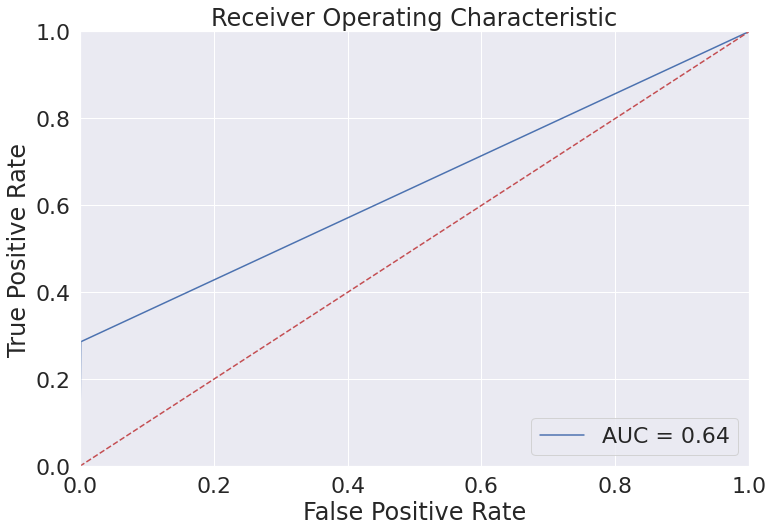

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [68]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'KNN')

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.308     0.998     0.471     29555
           2      0.998     0.286     0.445     92712

    accuracy                          0.458    122267
   macro avg      0.653     0.642     0.458    122267
weighted avg      0.831     0.458     0.451    122267



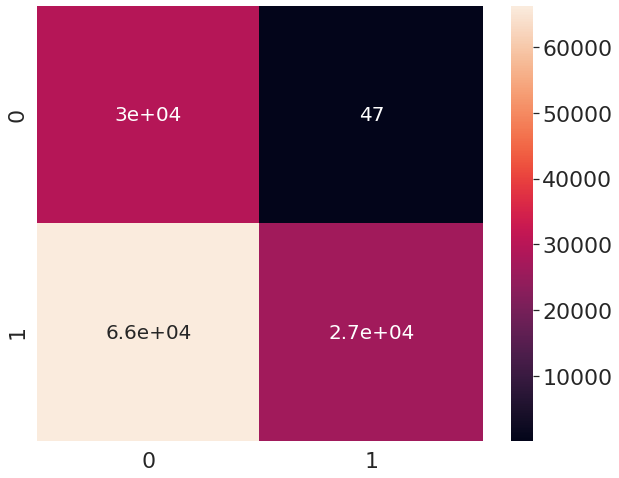

AUC score:  0.6423902204470288


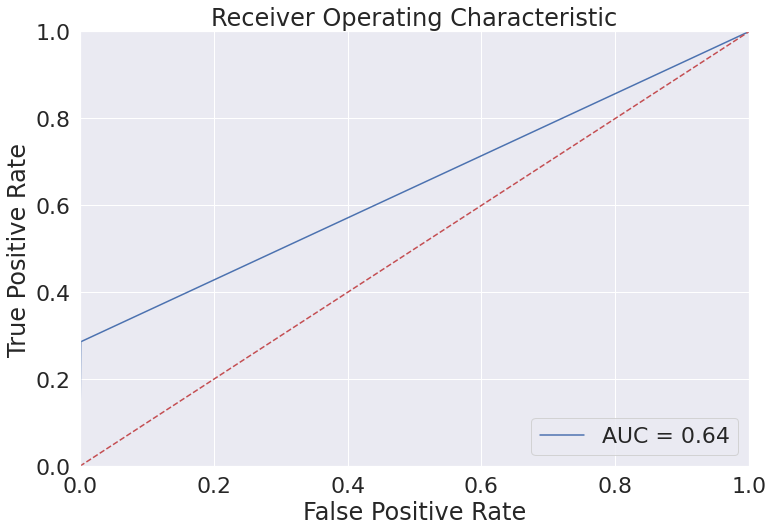

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [69]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SVM')

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.308     0.998     0.471     29555
           2      0.998     0.286     0.445     92712

    accuracy                          0.458    122267
   macro avg      0.653     0.642     0.458    122267
weighted avg      0.831     0.458     0.451    122267



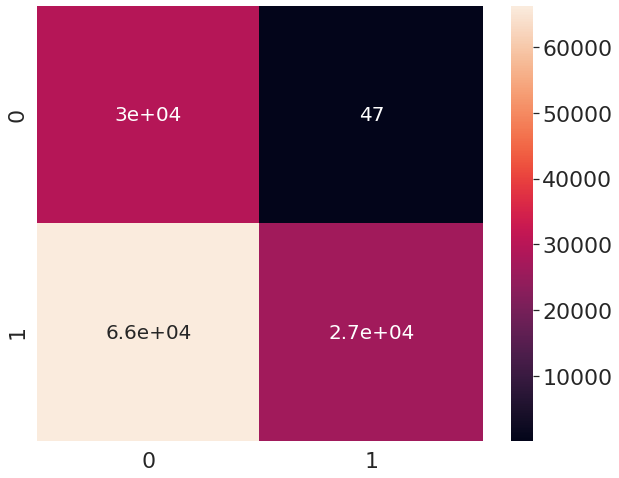

AUC score:  0.6423902204470288


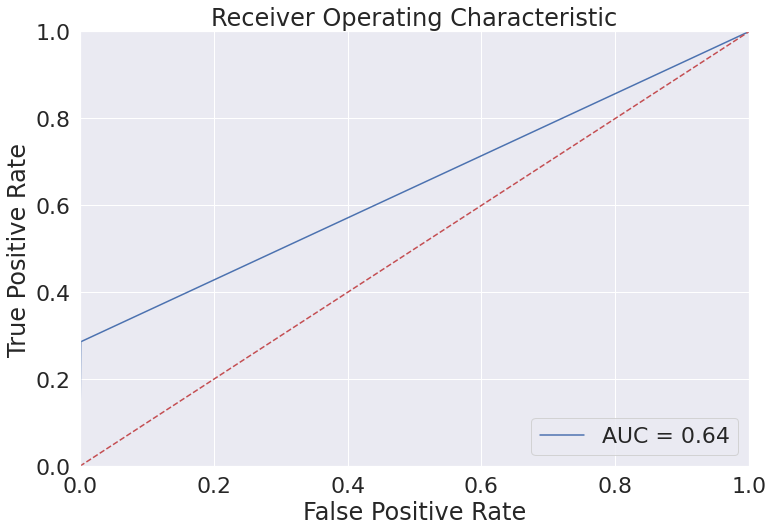

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [70]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'SOFTMAX')

Shape:  (122267, 115) (122267,)
----------------------Test is starting----------------------
Scale data
Shape:  (122267, 115) (122267,)
Normalize data
Shape:  (122267, 115) (122267,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.308     0.998     0.471     29555
           2      0.998     0.286     0.445     92712

    accuracy                          0.458    122267
   macro avg      0.653     0.642     0.458    122267
weighted avg      0.831     0.458     0.451    122267



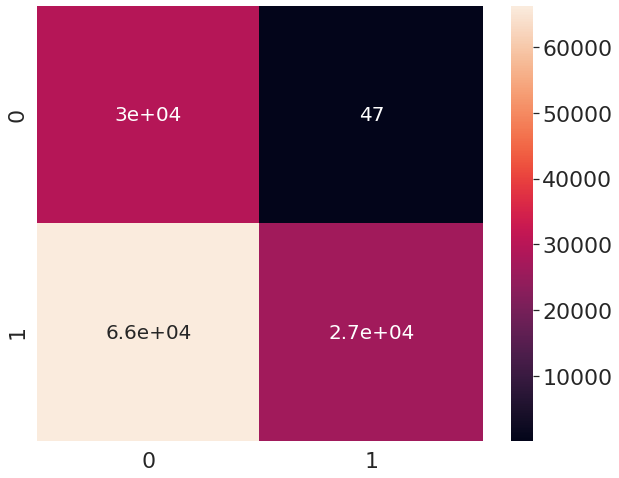

AUC score:  0.6423902204470288


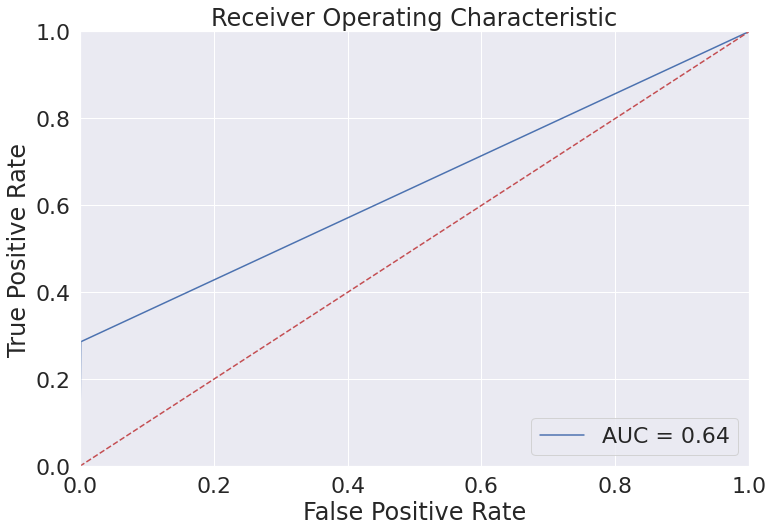

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [71]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_algo = True, algo = 'RF')

#### Test on Mirai

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.979     0.998     0.989     20653
           2      1.000     0.995     0.997     90196

    accuracy                          0.996    110849
   macro avg      0.989     0.997     0.993    110849
weighted avg      0.996     0.996     0.996    110849



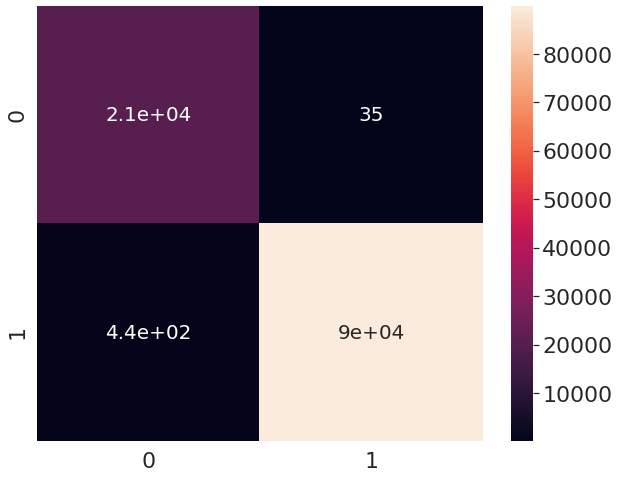

AUC score:  0.9967357068488861


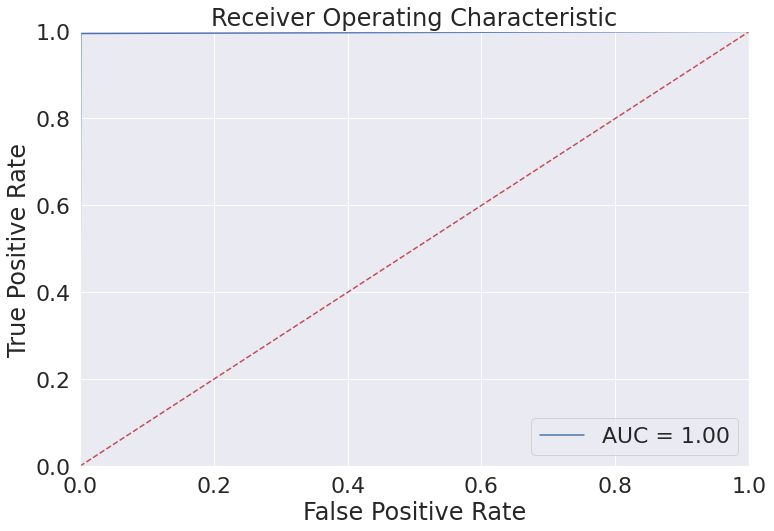

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [72]:
# does not use algorithm
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = False)

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.980     0.998     0.989     20653
           2      1.000     0.995     0.997     90196

    accuracy                          0.996    110849
   macro avg      0.990     0.997     0.993    110849
weighted avg      0.996     0.996     0.996    110849



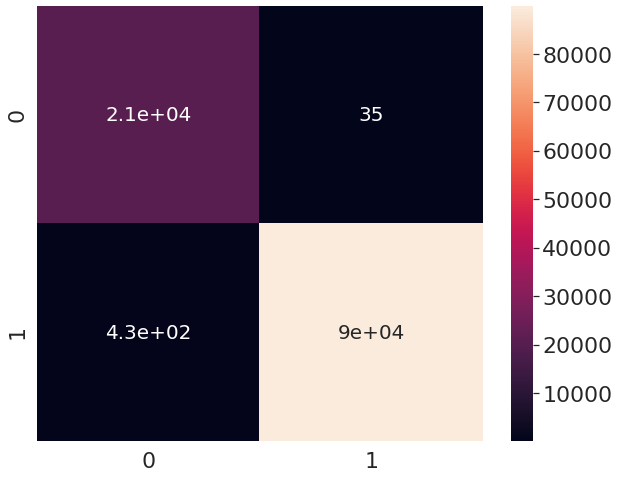

AUC score:  0.9967634242642925


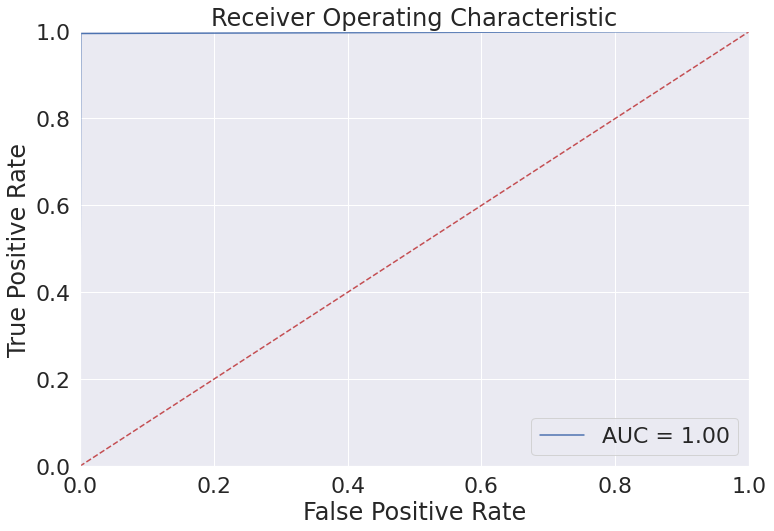

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [73]:
# use KNN
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'KNN')

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.979     0.998     0.989     20653
           2      1.000     0.995     0.997     90196

    accuracy                          0.996    110849
   macro avg      0.989     0.997     0.993    110849
weighted avg      0.996     0.996     0.996    110849



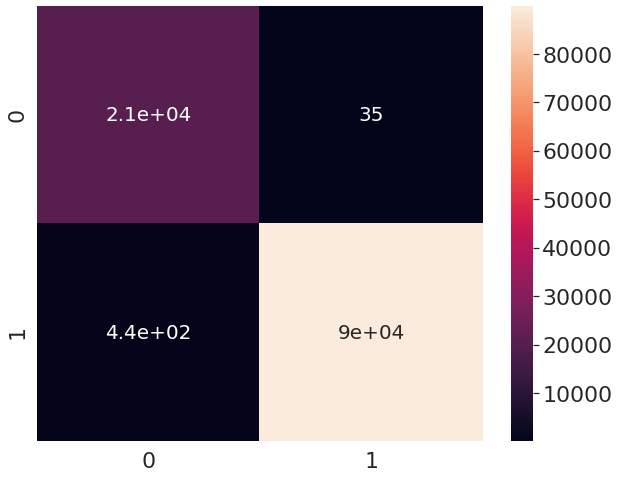

AUC score:  0.9967357068488861


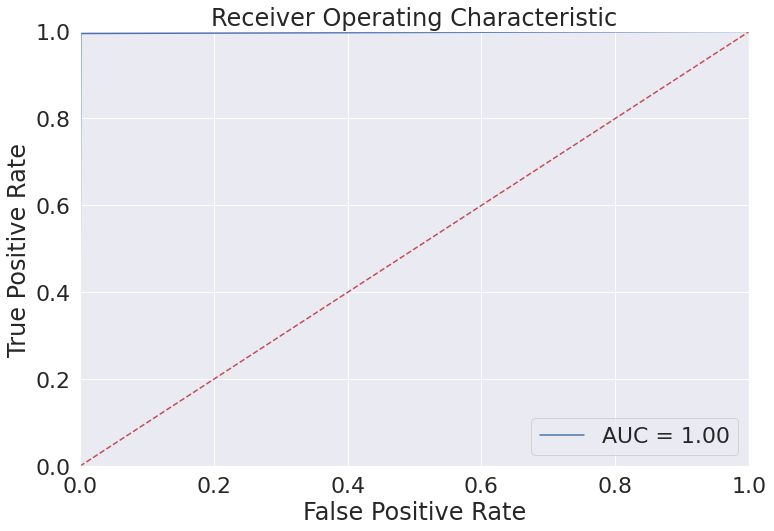

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [74]:
# use SVM
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SVM')

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.979     0.998     0.989     20653
           2      1.000     0.995     0.997     90196

    accuracy                          0.996    110849
   macro avg      0.989     0.997     0.993    110849
weighted avg      0.996     0.996     0.996    110849



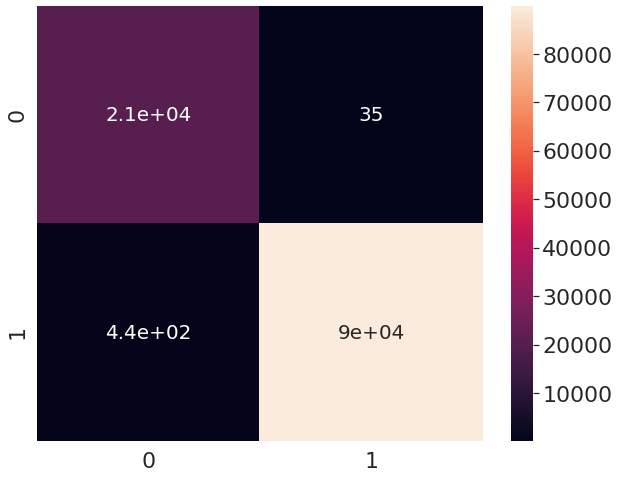

AUC score:  0.9967357068488861


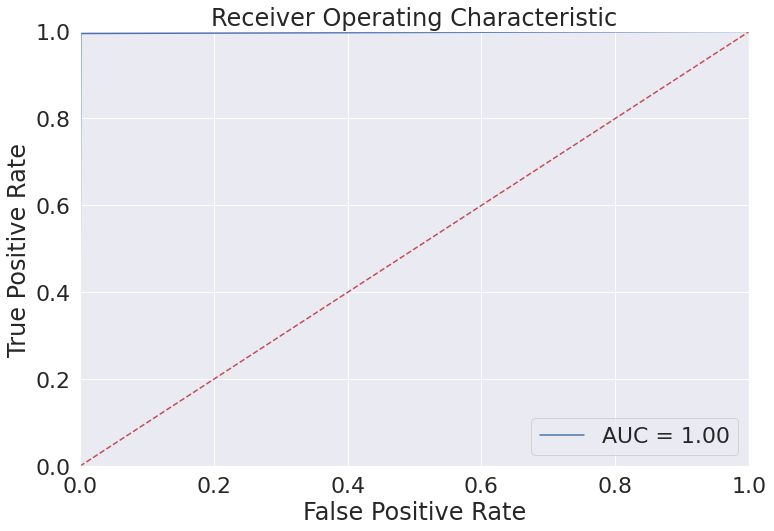

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [75]:
# use Softmax
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'SOFTMAX')

Shape:  (110849, 115) (110849,)
----------------------Test is starting----------------------
Scale data
Shape:  (110849, 115) (110849,)
Normalize data
Shape:  (110849, 115) (110849,)
Testing
----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.979     0.998     0.989     20653
           2      1.000     0.995     0.997     90196

    accuracy                          0.996    110849
   macro avg      0.989     0.997     0.993    110849
weighted avg      0.996     0.996     0.996    110849



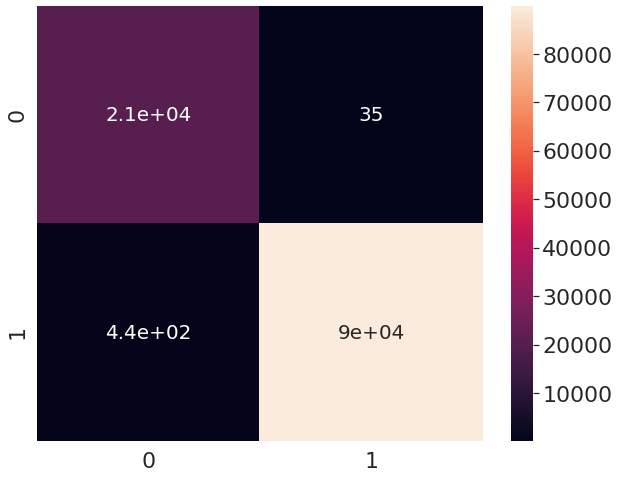

AUC score:  0.9967357068488861


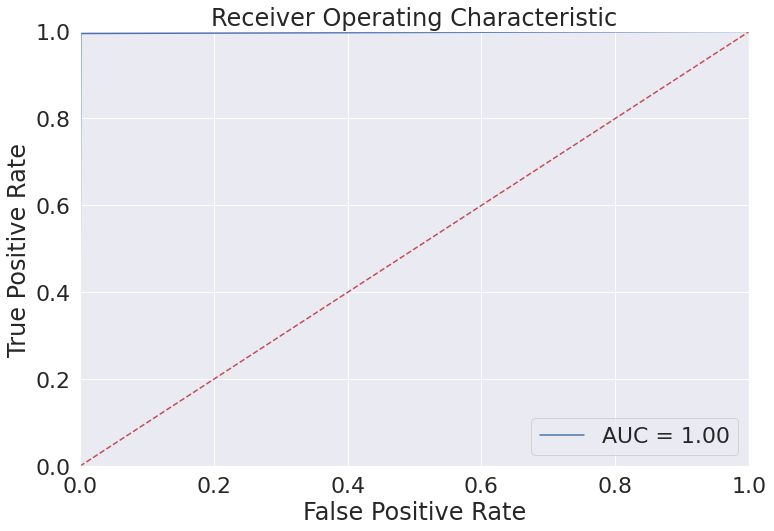

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [76]:
# use Random Forest
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
         X_test=X_test_mirai, y_test=y_test_mirai, using_algo = True, algo = 'RF')


## 2.2.4. ANNEAL

### Train

In [77]:
# som, winmap, outliers_percentage, scaler = process_train_partial(X_train=X_train_mirai_1, 
#                                                                  y_train=y_train_mirai_1, algo='anneal')

### Test on the same device

#### Test on gafgyt

In [78]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = False)

In [79]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, 
#          X_test=X_test_gafgyt, y_test=y_test_gafgyt, using_knn = True)

#### Test on Mirai

In [80]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=False)

In [81]:
# som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_mirai, y_test=y_test_mirai, using_knn=True)